In [25]:
# Importamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Función para la creación del grafo
def createGraph(graphDict):
    G = nx.Graph()

    # Iteramos por cada valor y construimos las conexiones
    for node, conexiones in graphDict.items(): 
        for conexión, valor in conexiones.items():
            G.add_edge(node, conexión, weight=valor)
    return G

# Función para la obtención de la Heurística
def euclideanHeuristic(a, b, pos):
    return np.linalg.norm(np.array(pos[a]) - np.array(pos[b]))

In [27]:
# Función para dibujar el grafo
def drawGraph(G, pathDijkstra=None, pathStar=None):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    
    # Dibujar nodos y etiquetas
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    # Dibujar camino de Dijkstra
    if pathDijkstra:
        edgesDijkstra = [(pathDijkstra[i], pathDijkstra[i + 1]) for i in range(len(pathDijkstra) - 1) if G.has_edge(pathDijkstra[i], pathDijkstra[i + 1])]
        nx.draw_networkx_edges(G, pos, edgelist=edgesDijkstra, edge_color='blue', width=2, label='Dijsktra')

    
    # Dibujar camino de A*
    if pathStar:
        edgesStar = [(pathStar[i], pathStar[i + 1]) for i in range(len(pathStar) - 1) if G.has_edge(pathStar[i], pathStar[i + 1])]
        nx.draw_networkx_edges(G, pos, edgelist=edgesStar, edge_color='red', width=2, style='dashed', label='A*')

    
    plt.legend()
    plt.show()

Camino más corto con Dijkstra: ['A', 'C', 'E', 'F'], Peso: 7
Camino más corto con A*: ['A', 'C', 'E', 'F'], Peso: 7


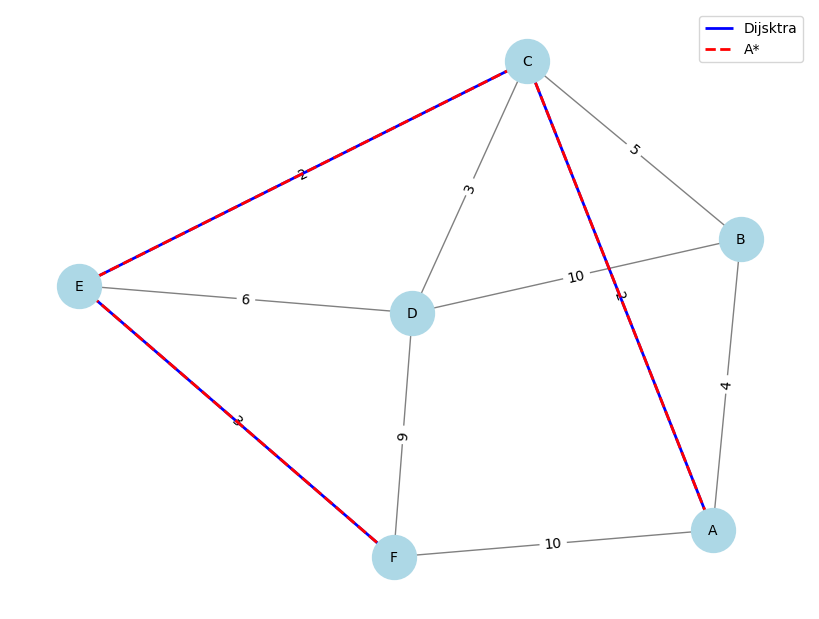

In [31]:
# Función Main
def main():
    start, end = 'A', 'F'  # Para Cambiar el punto de inicio y fin se pueden cambiar estos valores

    # Definimos el grafo
    graphDict = {
        'A': {'B': 4, 'C': 2, 'F': 10},
        'B': {'A': 4, 'C': 5, 'D': 10},
        'C': {'A': 2, 'B': 5, 'D': 3, 'E': 2},
        'D': {'B': 10,'C': 3, 'E': 6, 'F': 9},
        'E': {'C': 2, 'D': 6, 'F': 3},
        'F': {'D': 9, 'E': 3}
    }
    G = createGraph(graphDict)

    # Calcular posiciones para heurística
    pos = nx.spring_layout(G)
    
    # Camino con A*
    pathStar = nx.astar_path(G, start, end, weight='weight', heuristic=lambda a, b: euclideanHeuristic(a, b, pos))
    lengthStar = nx.astar_path_length(G, start, end, weight='weight', heuristic=lambda a, b: euclideanHeuristic(a, b, pos))
    # Camino con Dijkstra
    pathDijkstra = nx.dijkstra_path(G, start, end, weight='weight')
    lengthDijkstra = nx.dijkstra_path_length(G, start, end, weight='weight')

    # Pintamos los caminos
    print(f"Camino más corto con Dijkstra: {pathDijkstra}, Peso: {lengthDijkstra}")
    print(f"Camino más corto con A*: {pathStar}, Peso: {lengthStar}")
    
    # Dibujar el grafo con los caminos
    drawGraph(G, pathDijkstra, pathStar)

if __name__ == "__main__":
    main()
